<a href="https://colab.research.google.com/github/Ucchwas/Arrhythmia-on-ECG-Classification-using-CNN/blob/main/Apnea_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wfdb
import wfdb
import numpy as np
import matplotlib.pyplot as plt
!pip install biosppy
from biosppy.signals import ecg
from biosppy.signals import resp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 2.9 MB/s eta 0:00:00


In [2]:
record = wfdb.rdrecord('a01r', channels=[0, 1, 2, 3], pn_dir='apnea-ecg')

In [3]:
# Print all data with column names
for key, value in record.__dict__.items():
    print(f"{key}: {value}")

record_name: a01r
n_sig: 4
fs: 100
counter_freq: None
base_counter: None
sig_len: 2956796
base_time: None
base_date: None
comments: []
sig_name: ['Resp C', 'Resp A', 'Resp N', 'SpO2']
p_signal: [[-0.1015  -0.3446   0.23545 98.     ]
 [-0.1025  -0.3455   0.2364  98.     ]
 [-0.1035  -0.3464   0.23735 98.     ]
 ...
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.     ]]
d_signal: None
e_p_signal: None
e_d_signal: None
file_name: ['a01r.dat', 'a01r.dat', 'a01r.dat', 'a01r.dat']
fmt: ['16', '16', '16', '16']
samps_per_frame: [1, 1, 1, 1]
skew: [None, None, None, None]
byte_offset: [None, None, None, None]
adc_gain: [20000.0, 20000.0, 20000.0, 1.0]
baseline: [0, 0, 0, 0]
units: ['mV', 'mV', 'mV', 'mV']
adc_res: [16, 16, 16, 16]
adc_zero: [0, 0, 0, 0]
init_value: [-2030, -6892, 4709, 98]
checksum: [-21303, -27013, -10435, -4510]
block_size: [0, 0, 0, 0]


In [4]:
resp_signalC = record.p_signal[:, 0]
resp_signalA = record.p_signal[:, 1]
resp_signalN = record.p_signal[:, 2]
spo2_signal = record.p_signal[:, 3]

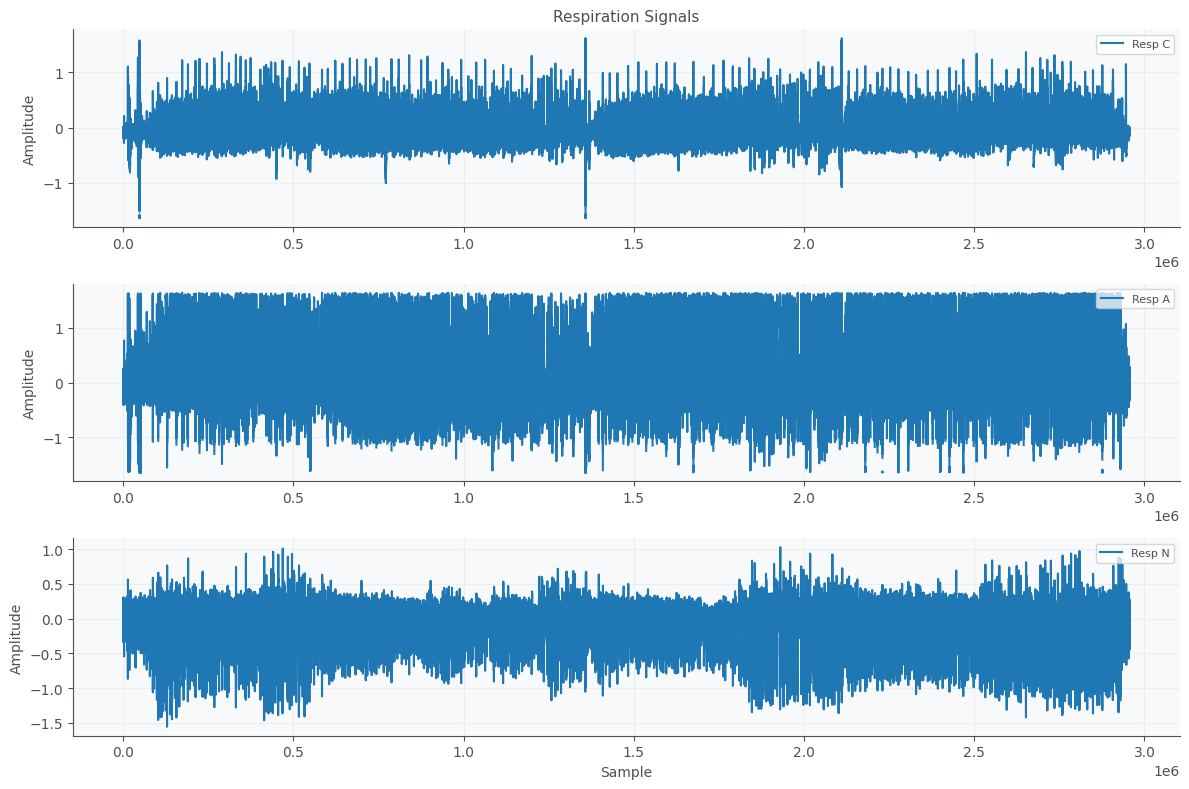

In [5]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot RESPC signal
plt.subplot(3, 1, 1)
plt.plot(resp_signalC, label='Resp C')
plt.title('Respiration Signals')
plt.ylabel('Amplitude')
plt.legend()

# Plot RESPA signal
plt.subplot(3, 1, 2)
plt.plot(resp_signalA, label='Resp A')
plt.ylabel('Amplitude')
plt.legend()

# Plot RESPN signal
plt.subplot(3, 1, 3)
plt.plot(resp_signalN, label='Resp N')
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
annotations = wfdb.rdann('a01r', extension='apn', pn_dir='apnea-ecg')

In [7]:
# Extract the annotation labels
annotation_labels = annotations.symbol

# Count the number of apnea and non-apnea signals
num_apnea = annotation_labels.count('A')
num_non_apnea = annotation_labels.count('N')

print(f"Number of Apnea signals: {num_apnea}")
print(f"Number of Non-apnea signals: {num_non_apnea}")

Number of Apnea signals: 470
Number of Non-apnea signals: 19


In [8]:
!pip install tsfel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


In [22]:
import tsfel
import pandas as pd

In [26]:
num_seconds = resp_signalC.shape[0]/100
num_minutes = num_seconds/60
print(num_minutes)

492.7993333333333


In [21]:
features = []
for i in range(len(annotations.sample)):
    start = annotations.sample[i]
    end = annotations.sample[i + 1] if i < len(annotations.sample) - 1 else len(resp_signalA)
    segment = resp_signalA[start:end]
    mean = np.mean(segment)
    std = np.std(segment)
    label = annotations.symbol[i]  # Assuming labels are in annotations.symbol
    features.append((mean, std, label))

In [27]:
features

[(-0.095640125, 0.2082350590608308, 'N'),
 (-0.04053876666666667, 0.15804152221166085, 'N'),
 (nan, nan, 'N'),
 (nan, nan, 'N'),
 (-0.07158925000000001, 0.21727245524595187, 'N'),
 (-0.11116070833333333, 0.22059579407802615, 'N'),
 (-0.055622975, 0.22189095039771084, 'N'),
 (nan, nan, 'N'),
 (nan, nan, 'N'),
 (-0.07367273333333334, 0.20739163912116182, 'N'),
 (-0.08560767500000001, 0.23468592045862283, 'N'),
 (-0.09775560833333333, 0.24566276713677349, 'N'),
 (-0.10348405833333334, 0.1813387606514759, 'N'),
 (-0.08050512500000001, 0.30157356792052864, 'A'),
 (nan, nan, 'A'),
 (-0.08974565833333334, 0.2524202472661413, 'A'),
 (-0.10303292500000001, 0.36884693640410565, 'A'),
 (nan, nan, 'A'),
 (-0.050108591666666674, 0.42478179174030034, 'A'),
 (-0.095107725, 0.39684075278681713, 'A'),
 (-0.07694582500000001, 0.38818419825256417, 'A'),
 (nan, nan, 'A'),
 (-0.10068045833333332, 0.3499669079918461, 'A'),
 (-0.0029285333333333246, 0.4910660897433755, 'A'),
 (-0.18267329166666665, 0.3407204

In [29]:
# Create DataFrame from features
df = pd.DataFrame(features)

# Save DataFrame to CSV
df.to_csv('dataset.csv', index=False)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

# Read the dataset
df = pd.read_csv('dataset.csv')

# Separate features and labels
X = df[['0', '1']]
y = df['2']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train a Logistic Regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_imputed)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           A       0.96      1.00      0.98        94
           N       0.00      0.00      0.00         4

    accuracy                           0.96        98
   macro avg       0.48      0.50      0.49        98
weighted avg       0.92      0.96      0.94        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create DataFrames for each signal
df_respC = pd.DataFrame(np.hstack(resp_signalC), columns=["Resp_C"])
# df_respA = pd.DataFrame(np.hstack(resp_signalA), columns=["Resp_A"])
# df_respN = pd.DataFrame(np.hstack(resp_signalN), columns=["Resp_N"])
# df_spo2 = pd.DataFrame(np.hstack(spo2_signal), columns=["SpO2"])

# Get features by domain
cfg_file = tsfel.get_features_by_domain()

# Extract features for each signal
features_respC = tsfel.time_series_features_extractor(cfg_file, df_respC, fs=record.fs)
# features_respA = tsfel.time_series_features_extractor(cfg_file, df_respA, fs=record.fs)
# features_respN = tsfel.time_series_features_extractor(cfg_file, df_respN, fs=record.fs)
# features_spo2 = tsfel.time_series_features_extractor(cfg_file, df_spo2, fs=record.fs)

# Display the extracted features DataFrames
print("Features for Resp C:")
print(features_respC.head())

# print("\nFeatures for Resp A:")
# print(features_respA.head())

# print("\nFeatures for Resp N:")
# print(features_respN.head())

# print("\nFeatures for SpO2:")
# print(features_spo2.head())

*** Feature extraction started ***
